In [44]:
# Import components
import datetime as dt
import math
import warnings
from statistics import mean

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pmdarima as pm
import seaborn as sns
from matplotlib import pyplot as pltw
from pmdarima import arima, datasets, model_selection, utils
from scipy.spatial import distance
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
from statsmodels.tsa.seasonal import STL

warnings.simplefilter("ignore")

plt.rcParams["font.family"] = "Hiragino Maru Gothic Pro"
plt.style.use("ggplot")  # グラフのスタイル
plt.rcParams["figure.figsize"] = [12, 9]  # グラフサイズ設定

In [45]:
df = pd.read_csv("../datasets/fixed_battery_log_2.csv")
df["date"] = pd.to_datetime(df["date"])
users = df["User"].unique()

In [46]:
bins = np.linspace(0, 100, 11)

In [55]:
hoge = pd.DataFrame(
    df.loc[
        (df["User"] == "Narita") & (df["state"] == "ON") & (df["date"] < "2022-01-31")
    ]["battery"].copy()
)
train = []
hoge = np.array(hoge)
for i in range(len(hoge)):
    train.append(hoge[i][0])
train = np.array(train)

In [56]:
foo = pd.DataFrame(
    df.loc[
        (df["User"] == "Narita") & (df["state"] == "ON") & (df["date"] < "2022-01-31")
    ]["battery"].copy()
)

test = []
foo = np.array(foo)
for i in range(len(foo)):
    test.append(foo[i][0])
test = np.array(test)

In [57]:
arima_model = pm.auto_arima(
    train, seasonal=True, m=12, trace=True, n_jobs=-1, maxiter=10
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1300.064, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1300.044, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1300.018, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1543.332, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1298.600, Time=0.03 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1300.402, Time=0.07 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1300.092, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=1300.471, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1298.334, Time=0.10 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1299.755, Time=0.17 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1300.089, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept

MAE:
17.972402327539683


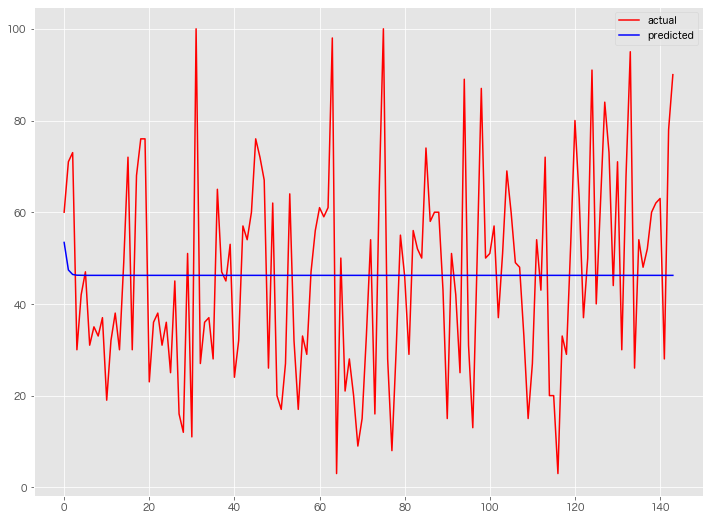

In [58]:
# グラフのサイズ変更
plt.rcParams["figure.figsize"] = [12, 9]
# 予測
preds, conf_int = arima_model.predict(n_periods=test.shape[0], return_conf_int=True)
# 予測精度
print("MAE:")
print(mean_absolute_error(test, preds))
# 予測と実測の比較（グラフ）
x_axis = np.arange(preds.shape[0])
plt.plot(test, label="actual", color="r")
plt.plot(preds, label="predicted", color="b")

plt.legend()
plt.show()

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_final = SARIMAX(
    train,
    order=(1,0,0),
    enforce_stationarity=True,
    enforce_invertibility=True,
)

results = model_final.fit()

print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.72397D+00    |proj g|=  1.05810D-03

At iterate    5    f=  4.72396D+00    |proj g|=  9.12118D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      1     0     0   8.749D-07   4.724D+00
  F =   4.7239625172101363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observati

 This problem is unconstrained.
